# Actividad 7 - Árboles de Regresión
- Para poder realizar esta actividad debes haber revisado la lectura correspondiente a la semana.
- Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). Una vez terminada la actividad, comprime la carpeta y sube el .zip a la sección correspondiente.

# Descripción de Actividades
- Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa.
- La base se compone de 2930 registros y contiene un gran número de atributos.
- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price .

# Desafío 1: Preparación del ambiente de trabajo
- Importe las librerías clásicas a utilizar.
- Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase
*DecisionTreeRegressor .*
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
- Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import helpers as afx
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import GridSearchCV
import pickle


In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

In [3]:
df.head()

MS_SubClass                 MS_Zoning  \
0  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
1  One_Story_1946_and_Newer_All_Styles  Residential_High_Density   
2  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
4             Two_Story_1946_and_Newer   Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
0           141     31770   Pave  No_Alley_Access  Slightly_Irregular   
1            80     11622   Pave  No_Alley_Access             Regular   
2            81     14267   Pave  No_Alley_Access  Slightly_Irregular   
3            93     11160   Pave  No_Alley_Access             Regular   
4            74     13830   Pave  No_Alley_Access  Slightly_Irregular   

  Land_Contour Utilities Lot_Config  ...            Fence Misc_Feature  \
0          Lvl    AllPub     Corner  ...         No_Fence         None   
1          Lvl    AllPub     Inside  ...  Minimum_Privacy         None   
2          Lvl    AllPub     Corner  ...         No_Fence         Gar2   
3          Lvl    AllPub     Corner  ...         No_Fence         None   
4          Lvl    AllPub     Inside  ...  Minimum_Privacy         None   

  Misc_Val Mo_Sold Year_Sold Sale_Type Sale_Condition Sale_Price  Longitude  \
0        0       5      2010       WD          Normal     215000 -93.619754   
1        0       6      2010       WD          Normal     105000 -93.619756   
2    12500       6      2010       WD          Normal     172000 -93.619387   
3        0       4      2010       WD          Normal     244000 -93.617320   
4        0       3      2010       WD          Normal     189900 -93.638933   

    Latitude  
0  42.054035  
1  42.053014  
2  42.052659  
3  42.051245  
4  42.060899  

[5 rows x 81 columns]

# Desafío 2: Feature engineering
- Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object' , realice lo siguiente:
    1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
    - Utilizando el método pd.concat , concatene a los atributos creados en la base de datos. 
- tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

In [4]:
objetos = df.select_dtypes('object').columns

In [5]:
df_recoded = pd.get_dummies(data=df, columns=objetos, drop_first=True, prefix=objetos)

In [6]:
df_recoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 307 entries, Lot_Frontage to Sale_Condition_Partial
dtypes: float64(2), int64(33), uint8(272)
memory usage: 1.5 MB


# Desafío 3: Primer modelo
- Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
- Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
- Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
- Comente sobre el desempeño.

In [7]:
X = df_recoded.drop(columns='Sale_Price')
y = df_recoded['Sale_Price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=3504)

In [9]:

dec_tree = DecisionTreeRegressor(random_state=3504).fit(X_train, y_train)

In [10]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

print("Test RMSE:", np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test)).round(5)))
print("Test MAE:", median_absolute_error(y_test, dec_tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree.predict(X_test)).round(5))

Test RMSE: 36741.95156219604
Test MAE: 16000.0
Test R2: 0.80578


Un 78% de la variabilidad de la muestra es explicada por los atributos estudiados, sin embargo, tenemos errores my grandes, de todas formas sin tener una comparación, no sabemos si es un buen modelo o no.

In [11]:
df_recoded['Sale_Price'].mean()

180796.0600682594

# Desafío 4: Importancia relativa
- Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
- Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price .
- Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

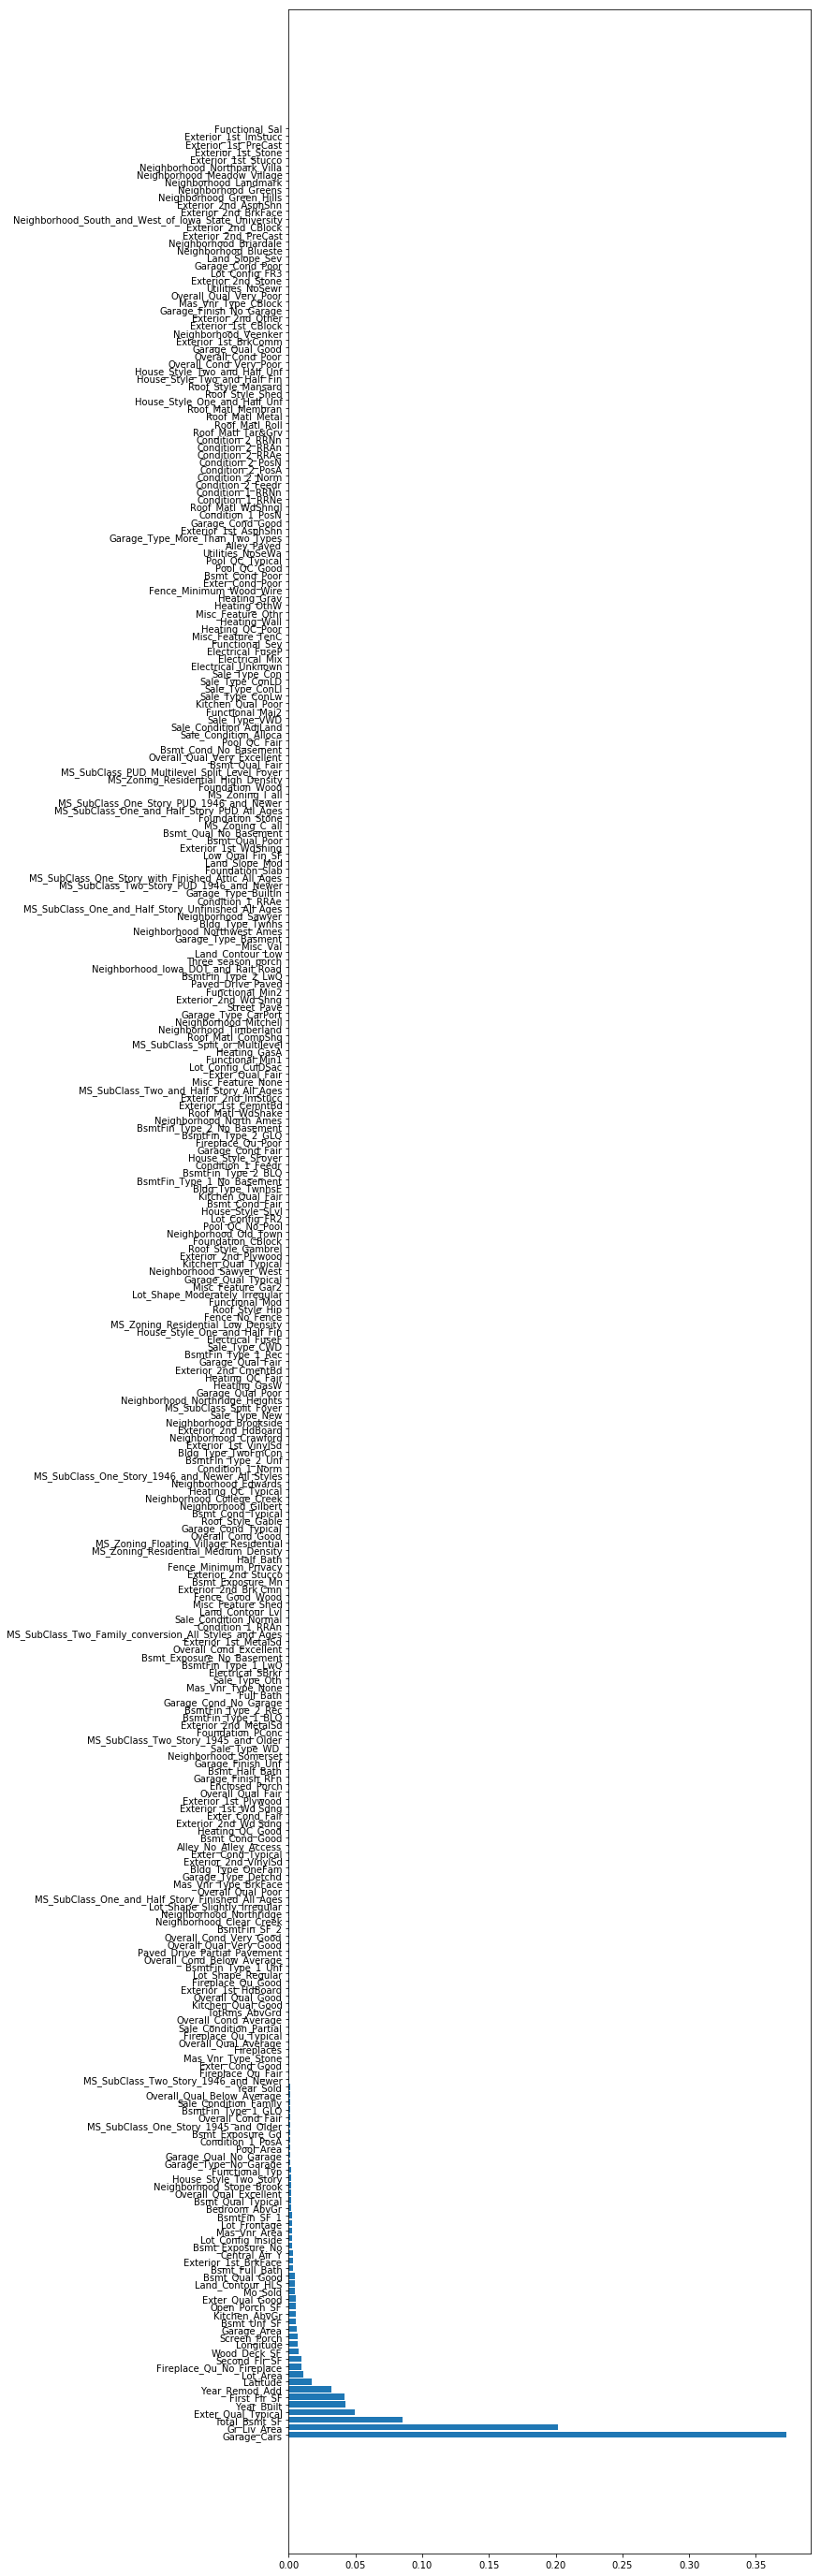

In [16]:
plt.figure(figsize=(10,50))
afx.plot_feature_importance(dec_tree, X.columns)

In [47]:
importance = dec_tree.feature_importances_

In [48]:
sort_importance = np.argsort(importance)[::-1]

In [55]:
top_10 =afx.infer_k_features(X, dec_tree,X.columns ).columns

Los que más impactan tienen que ver con el area (Lot_Area, latitude), los años, si tienen remodelacion, si tiene garage y si tiene chimenea.

# Desafío 5: Refactorización del modelo y pickling
- En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
- Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:
- Máximo de atributos: Evalúe todos los posibles atributos. Máximo de profundidad: entre 1 a 32.
- Validaciones cruzadas : 5.
- Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de valudación con el modelo por defecto.

In [74]:
df_top10 = df_recoded[top_10]

In [75]:
df_top10['Sale_Price']= df['Sale_Price']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


X = df_top10.drop(columns='Sale_Price')
y = df_top10['Sale_Price']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=3504)

In [91]:
dec_tree_grid_cv = GridSearchCV(DecisionTreeRegressor(),                              
                                   {
                                   'max_depth': np.linspace(1, 32, 32),
                                    # evaluando 10 escenarios
                                   'max_features': list(range(1,X_train.shape[1]))},
                                # Con 5 validaciones cruzadas
                                cv=5,
                                # Ocupando todos los núcleos del computador
                                n_jobs=-1,scoring='neg_mean_squared_error').fit(X_train, y_train)

In [92]:
dec_tree_grid_cv.best_params_

{'max_depth': 8.0, 'max_features': 4}

In [93]:
dec_tree = DecisionTreeRegressor(random_state=3504, max_depth=8, max_features=4).fit(X_train, y_train)

In [94]:
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test)).round(5)))
print("Test MAE:", median_absolute_error(y_test, dec_tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree.predict(X_test)).round(5))

Test RMSE: 39421.71680378101
Test MAE: 15956.69643
Test R2: 0.77642


Aumenta el RMSE, pero disminuye el MAE, debiesemos revisar cual es la métrica que utilizaremos para tomar nuestras decisiones (depende del **problema de negocio**)

In [106]:
pickle.dump(dec_tree, open('eduardo-callejas-actividad07.sav',
'wb'))

In [118]:
dec_tree_christian = pickle.load(open('christian-gomez-actividad07.sav','rb'))

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [119]:
dec_tree_christian.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7.0, max_features=4,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3504, splitter='best')

In [120]:
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, dec_tree_christian.predict(X_test)).round(5)))
print("Test MAE:", median_absolute_error(y_test, dec_tree_christian.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree_christian.predict(X_test)).round(5))

Test RMSE: 36777.602148116865
Test MAE: 15435.03846
Test R2: 0.80541


El modelo de Christian es mejor :( 